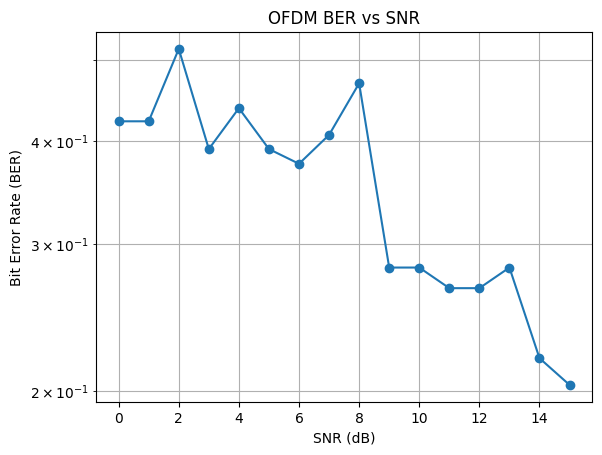

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_subcarriers = 64  # Number of subcarriers
N_symbols = 1000   # Number of OFDM symbols to transmit
M = 4             # Modulation order (QPSK)
CP_length = 16     # Cyclic prefix length 

# Generate data
data_bits = np.random.randint(0, 2, N_symbols)
data_symbols = (2*data_bits - 1) + 1j*(2*np.random.randint(0, 2, N_symbols) - 1)  # QPSK modulation

# SNR range
SNR_dB = np.arange(0, 16, 1)
SNR = 10**(SNR_dB/10)

BER_vec = np.zeros(len(SNR))

def ofdm_modulate(data_symbols, N_subcarriers, CP_length):
    data_symbols = data_symbols[:N_subcarriers]  # Ensure correct length
    data_fft = np.fft.ifft(data_symbols)
    return np.concatenate([data_fft[-CP_length:], data_fft])

def ofdm_demodulate(received_signal, N_subcarriers, CP_length):
    received_signal = received_signal[CP_length:CP_length + N_subcarriers]  # Extract valid part
    data_fft = np.fft.fft(received_signal)
    return data_fft[:N_subcarriers]

for i in range(len(SNR)):
    # OFDM modulation with CP
    ofdm_signal = ofdm_modulate(data_symbols, N_subcarriers, CP_length)
    
    # Add AWGN
    noise = np.sqrt(1/(2*SNR[i])) * (np.random.randn(*ofdm_signal.shape) + 1j*np.random.randn(*ofdm_signal.shape))
    received_signal = ofdm_signal + noise
    
    # OFDM demodulation 
    demod_symbols = ofdm_demodulate(received_signal, N_subcarriers, CP_length)
    
    # Demodulate and count errors
    demod_bits = (np.real(demod_symbols) > 0).astype(int)
    errors = np.sum(data_bits[:N_subcarriers] != demod_bits)
    BER_vec[i] = errors / N_subcarriers

# Plot BER vs SNR
plt.figure()
plt.semilogy(SNR_dB, BER_vec, 'o-')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('OFDM BER vs SNR')
plt.grid(True, which='both')
plt.show()